# 문제 1 # 독립표본 t-test
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

- 1 연구가설과 귀무가설을 설정하라
- 2 통계량을 구하고, 연구가설 채택여부를 기술하라.
- 3 2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [23]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df.head()
### 남학생과 여학생은 독립적인 두 집단이며, 단일집단 내 처리 전후를 보는 것이 아님
### 평균 혈압에 차이가 없는지 분석하는 것이므로 독립표본  T-검정을 시행한다

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


- 유의확률 : 대립가설이 유의하지 않으나 우연히 채택될 확률
- 유의 수준 : 귀무가설을 기각하는 기준(기본0.05)

### 독립표본 t-test
- 정의 : 독립된 두 표본 집단의 평균을 비교 (예) A통신사와 B통신사 고객들 하루 통화 평균(분) 비교)
- 가정 : 독립표본 t-test는 두 모집단은 정규성을 만족해야하며, 두 모집단의 분산이 서로 같아야한다.
- stats.ttest_ind(x1,x2, equal_var=True)
- 귀무가설 : 두 집단의 종속변수 차이는 없다.
- 연구가설 : 두 집단의 종속변수 차이가 있다.

In [27]:
### 두 집단이 모두 정규분포를 따르며 등분산을 가정하므로 바로 독립표본 t-검정(equal_ var=True) 식을 시행할 수 있다.
import scipy.stats as stats
female = df.loc[df['gender']=='female', 'pressure']
male = df.loc[df['gender']=='male', 'pressure']

stats.ttest_ind(female, male, equal_var=True)
### p-value 가 0.12로 귀무가설을 채택하여  남학생과 여학생의 혈압의 차이가 없음을 확인할 수 있다.

Ttest_indResult(statistic=-1.598335024574904, pvalue=0.12361716364314851)

In [28]:
print(female.mean(), male.mean())

89.9111111111111 96.21875


Text(0, 0.5, 'pressure')

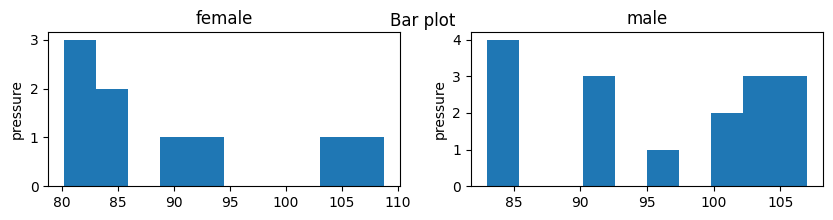

In [29]:
#히스토그램
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1,2, figsize=(10,2))
fig.suptitle('Bar plot')
axs[0].hist(female) # bins 인자
axs[0].set_title('female')
axs[0].set_ylabel('pressure')
axs[1].hist(male)
axs[1].set_title('male')
axs[1].set_ylabel('pressure')

#막대그래프
# female_ps = pd.value_counts(female.values, sort=False)
# male_ps = pd.value_counts(male.values, sort=False)
# fig, axs=plt.subplots(1,2, figsize=(10,2))
# fig.suptitle('Bar plot')
# axs[0].hist(female_ps.index, female_ps.values)
# axs[0].set_title('female')
# axs[0].set_ylabel('pressure')
# axs[1].hist(male_ps.index, male_ps.values)
# axs[1].set_title('male')
# axs[1].set_ylabel('pressure')

### IF 문제 정규성과 등분산성을 만족한다는 가정이 없었다면
- 정규성 검정과 등분성 검정을 진행해야한다.


```
step1. 정규성 검정
# 귀무가설 : 정규성을 가진다.
# 대립가설 : 정규성을 가지지 않는다.
Import scipy.stats as stats
from scipy.stats import shapiro

scipy.stats.shaipro(남학생혈압)
scipy.stats.shaipro(여학생혈압)

-> 정규성을 만족하지 않으면 t-test를 수행할 수 없다. 두 샘플간의 순위합 검정을 진행해야한다.



step2-1 정규성 만족하에 등분산성 검정
stats.levene(남학생혈압, 여학생혈압)
# 귀무가설 : 등분산성을 만족한다.
# 대립가설 : 등분산성을 만족하지 않는다.

-> 두 표본의 분산이 같은 경우와 같지 않은 경우 적용되는 t-test 공식이 다르다.

step2-2 정규성 만족X하에 순위합 검정
# 귀무가설 : 두 모집단 간 평균 차이가 없다.
# 대립가설 : 두 모집단간 평균 차이가 있다.
stats. Wilcoxon(남학생혈압 X_1, 여학생혈압 X_2, alternative='two-side'/'greater'/'less')
# alternative 인자 의미 차례로 양측검정 평균이 같다/단층검정 X_1 is ___ than X_2


step3-1 정규성O, 등분산성X 가정하에 t-test
stats.ttest_ind(남학생혈압, 여학생혈압, equal_var=False)

step3-2 정규성O, 등분산성O 가정하에 t-test
stats.ttest_ind(남학생혈압, 여학생혈압, equal_var=True)


```



### 신뢰구간
- 각 샘플들의 신뢰구간 측정
- scipy.stats 의 t.interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차)

### 귀무가설 채택/기각에 따라 신뢰구간 차이
t-test 독립표본 검정에서 귀무가설과 대립가설은 다음과 같이 설정됩니다:

귀무가설(H0): 두 표본집단의 평균은 같다.
대립가설(H1): 두 표본집단의 평균은 같지 않다.
t-test 결과, 귀무가설을 채택하게 된다면 두 표본집단의 평균은 같다고 판단됩니다. 이 경우 신뢰구간을 구하는 것은 의미가 없습니다. 왜냐하면 귀무가설을 채택했기 때문에 두 표본집단의 평균이 같다고 가정하고 검정한 결과입니다. 따라서 신뢰구간이 필요하지 않습니다.

반면, t-test 결과, 귀무가설을 기각하여 대립가설을 채택한다면 두 표본집단의 평균은 같지 않다고 판단됩니다. 이 경우에는 신뢰구간을 구하는 것이 의미가 있습니다. 이 신뢰구간은 두 표본집단의 평균 차이를 나타내며, 해당 신뢰구간이 0을 포함하지 않음을 의미합니다. 이것은 두 표본집단의 평균이 서로 다를 가능성이 높다는 것을 보여줍니다.

따라서** t-test 독립표본 검정에서 귀무가설 채택과 기각에 따라 신뢰구간이 의미가 있는지 없는지가 결정됩니다. **귀무가설을 채택한 경우 신뢰구간은 필요하지 않으며, 대립가설을 채택한 경우 신뢰구간이 두 집단의 평균 차이를 나타내는 중요한 정보가 됩니다.

### 독립표본 t-test의 귀무가설이 채택되었을 때 신뢰구간
- 남학생과 여학생의 혈압 차이가 없으므로 두 집단의 모집단은 동일하다.
- 표본을 합쳐서 낸다.



GPT 답변

t-test 독립표본 검정에서 두 표본집단이 평균의 차이가 없다고 판단되었다는 것은 귀무가설(H0)을 기각하지 못했다는 것을 의미합니다. 따라서 귀무가설인 "두 표본집단의 평균은 같다"라는 가정을 유지하며 신뢰구간을 구할 수 있습니다. 이 때의 신뢰구간을 구하는 방법은 다음과 같습니다.

1. 독립표본 t-test를 수행한 후, t-값과 p-값을 얻습니다.
2. p-값이 유의수준(alpha)보다 크면 귀무가설을 기각하지 못하므로 두 표본집단의 평균은 같다고 가정합니다.
3. 평균의 차이가 없다고 판단된다면, 두 표본집단의 평균의 차이가 0이라고 가정할 수 있습니다.
이후에는 해당 평균의 차이가 포함되는 신뢰구간을 구할 수 있습니다. 보통 신뢰수준(confidence level)을 정하고 해당 신뢰수준에 해당하는 t-분포의 임계값을 사용하여 신뢰구간을 계산합니다.

신뢰수준을 95%로 설정한다면, 일반적으로 사용되는 95% 신뢰구간을 구하려면 다음과 같은 단계를 따릅니다.

**두 표본집단의 크기(n1, n2)와 각각의 표준편차(standard deviation, s1, s2)를 사용하여 풀면 풀면 두 표본평균의 차이를 나타내는 통계량인 t를풀면
평균의 차이 = 표본평균1 - 표본평균2
통계량t = (표본평균1 - 표본평균2) / √((s1^2 / n1) + (s2^2 / n2))**


**t-분포 표를 사용하여 95% 신뢰수준에 해당하는 t-값을 찾습니다. 자유도는 n1 + n2 - 2입니다.**

**구한 t-값을 사용하여 신뢰구간을 계산합니다.
신뢰구간 = (풀면 - t* × 표준오차, 풀면 + t* × 표준오차)**

**여기서 t*는 95% 신뢰수준에서의 t-분포의 임계값이고, 표준오차는 풀면의 표준오차를 나타냅니다**

위의 단계를 따라 하여, 두 표본집단의 평균의 차이가 없다고 판단되었을 때, 해당 평균의 차이가 포함된 신뢰구간을 구할 수 있습니다. **이 신뢰구간은 두 집단의 평균 차이를 나타내며, 해당 신뢰구간이 0을 포함하면 두 집단의 평균이 서로 차이가 없다는 것을 의미합니다.**

In [32]:
# 각 집단의 평균
p_m, p_f = np.mean(male), np.mean(female)
mean_diff = p_m - p_f
mean_diff

6.307638888888903

In [34]:
# t통계량
statistic = stats.ttest_ind(male, female, equal_var=True)[0]
statistic

1.598335024574904

In [36]:
sp = mean_diff/statistic
sp

3.9463809476154688

In [44]:
stats.t(len_m + len_f-2).isf(0.975)*sp

-8.163710980897445

In [43]:
stats.t(len_m + len_f-2).isf(0.025)*sp

8.163710980897447

In [42]:
### 95%신뢰구간 생성
len_m, len_f = len(male),len(female)
lower = (mean_diff) + stats.t(len_m + len_f-2).isf(0.975)*sp
upper = (mean_diff) + stats.t(len_m + len_f-2).isf(0.025)*sp
print(lower,upper)

-1.8560720920085423 14.47134986978635


In [40]:
## chatgpt에게 물어본 다른 풀이

sample1 = male
sample2 = female

n1, n2 = len(sample1), len(sample2)
mean1, mean2 = np.mean(sample1), np.mean(sample2)
var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
standard_error = np.sqrt(pooled_var * (1 / n1 + 1 / n2))
confidence_interval = stats.t.interval(0.95, n1 + n2 - 2, loc=mean1 - mean2, scale=standard_error)

In [41]:
confidence_interval

(-1.8560720920085423, 14.471349869786348)

#### IF 독립표본 ttest 귀무가설이 기각되었을 때 신뢰구간 측정 방법

t-test 독립표본 검정에서 두 표본집단이 평균의 차이가 있다고 판단되었다는 것은 귀무가설(H0)을 기각한 것을 의미합니다. 따라서 대립가설(H1)이 채택되었으며, 두 표본집단의 평균은 서로 다르다고 주장할 수 있습니다. 이 경우 평균의 차이가 있는 신뢰구간을 구하는 방법은 다음과 같습니다.

1. 독립표본 t-test를 수행한 후, t-값과 p-값을 얻습니다.
2. p-값이 유의수준(alpha)보다 작으면 귀무가설을 기각하고 대립가설을 채택하므로, 두 표본집단의 평균은 서로 다르다고 가정합니다.
3. 평균의 차이가 있다고 판단된다면, 두 표본집단의 평균의 차이가 0이 아니라고 가정할 수 있습니다.
이후에는 해당 평균의 차이가 포함되는 신뢰구간을 구할 수 있습니다. 보통 신뢰수준(confidence level)을 정하고 해당 신뢰수준에 해당하는 t-분포의 임계값을 사용하여 신뢰구간을 계산합니다.

**신뢰구간을 구하는 식은 독립표본 t-test 귀무가설 채택되었을 때 와 동일하여
차이점은 이 신뢰구간은 두 집단의 평균 차이를 나타내며, 해당 신뢰구간이 0을 포함하지 않음을 의미합니다. 이것은 두 표본집단의 평균이 서로 다른 가능성이 높다는 것을 보여줍니다.**

##### IF 각 샘플에 대한 신뢰구간 측정 방법

In [ ]:
female.values

array([ 92.7,  89.1,  81.1,  80.2,  85.3,  82.8, 108.8,  84.3, 104.9])

In [ ]:
len(female)

9

In [ ]:
#신뢰구간
#신뢰구간 측정을 위해서 scipy.stats의
# t.interval(신뢰도, 자유도, loc=샘플평균, scale= 샘플표준오차)를 사용하면 비교적 손쉽게 계산이 가능하다.
from scipy.stats import t
import numpy as np

# 각 샘플에 대한 신뢰구간 측정
def confidence_interval(sample) :
    n=len(sample) # 샘플 사이즈
    dof = n-1 #자유도(degree of freedom : 총 관측치 -1)
    sample_mean = np.mean(sample) ## 표본 평균
    sample_std= np.std(sample, ddof=1) ## 표본 표준편차
    #파이썬에서는 표준편차를 계산할 때, 옵션으로 ddof라는 것을 사용한다.
    #위의 코드에서 ddof=1은 표준편차를 계산할 때, n-1로 나누라는 의미이다.
    sample_std_error = sample_std/n**0.5 # 표본 표준오차 = 표준편차/루트(샘플사이즈)

    ## 신뢰구간 : stats.t.interval()
    CI_min, CI_max= t.interval(.95, dof, loc=sample_mean, scale=sample_std_error)
    print(CI_min, CI_max)

    ## 시각화
    ax = pd.DataFrame(sample).plot(kind="kde")
    ax.plot([CI_min, CI_min], [-0.002, 0.045])
    ax.plot([CI_max, CI_max], [-0.002, 0.045])
    plt.title("{}sampling".format(n))
    plt.show()
    # 샘플 사이즈가 커질 수록 모집단의 분포와 비슷해진다.
    # 샘플의 사이즈가 작으면 신뢰구간이 넓어지고
    # 샘플 사이즈가 커지면 신뢰구간이 점점 좁아지는 것을 확인할 수 있다. # 정규분포 == 예쁜 종모양

81.91756912051609 97.9046531017061


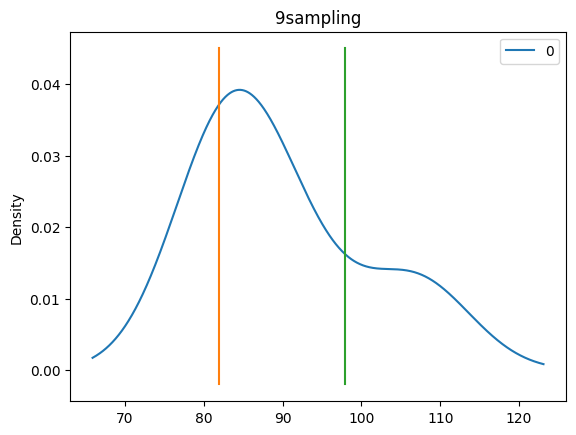

In [ ]:
confidence_interval(female.values)
# 주황색과 초록색 의미가 뭐지? 신뢰구간이 뭐지?

91.45648960964817 100.98101039035183


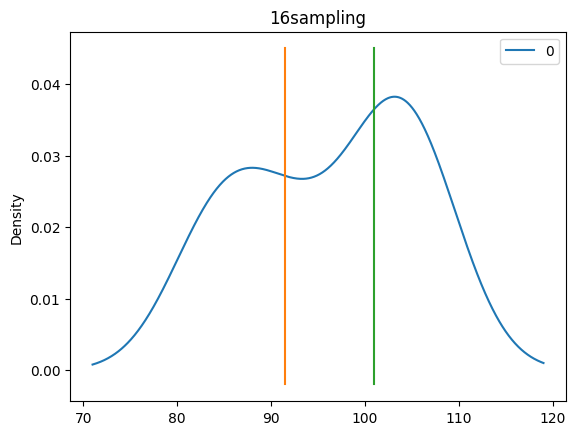

In [ ]:
confidence_interval(male.values)

# 문제 2 # 쌍체표본 t-test
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 1 귀무가설과 대립가설을 세우시오
- 2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [2]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3
5,F,46.1,61.3
6,G,53.8,42.7
7,H,49.4,50.2
8,I,49.6,49.1
9,J,51.6,57.7


### 쌍체표본 t-test
- 정의 : 실험전 집단과 실험 후 집단과 같이 동일한 표본이 두개의 서로 다른 상황에서 특정 수치형 변수의 평균이 동일한지 여부 비교(예, A통신사 고객 중 S 사의 새로운 스마트폰으로 교체한 고객들의 교체 이전과 이후 하루통화량(분) 비교)
- 가정 : 모집단의 관측값이 정규성을 만족해야한다.분석 대상의 표본이 반드시 대응되어야 한다.
(표본 내 같은 개체들 측정을 두번 하므로 등분산성이 자동 만족한다고 본다.)
- * 만약, 데이터가 완전한 쌍체를 이루지 않는다면, 결측값이 존재하므로 삭제법, 표본 평균법, 단순대치법, 다중대치법, Hot-deck 대체법 등으로 결측값을 처리하여야 한다.

- stats.ttest_rel(쌍체를 이루는 두 데이터 세트)
- 귀무가설 : 두 모평균 사이의 차이는 없다.
- 연구가설 : 두 모평균 사이의 차이가 있다.

In [13]:
# 정규성 검정
import scipy.stats as stats
from scipy.stats import shapiro

print(stats.shapiro(df["up"]),'\n',
stats.shapiro(df["down"]))
# 두 집단 모두 pvalue가 0.05이상으로 귀무가설을 채택하여 정규성을 만족한다고 본다.

ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447699666023254) 
 ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)


In [15]:
# 정규성을 만족하므로 t-test 쌍체표본을 진행한다.
stats.ttest_rel(df["up"], df["down"])
# t-test 쌍체표본 검정확률은 약 1.29이고 유의 확률 pvalue 가 약 0.21로, 유의수준 0.05보다 크므로 귀무가설을 채택하여
# 두 모평균 사이의 차이는 없다고 볼 수 있다.
# 따라서 강의 상류와 강의 하류 두 집단의 차이는 없다.

TtestResult(statistic=1.2922226959983891, pvalue=0.21262429174344777, df=18)

### IF 두 개의 표본 집단이 정규분포를 따르지 않는다면
- (+표본의 수가 30개 미만이라면) 모수적 통계분석 기법을 적용하기 어렵다.
- wilcoxon 부호-순위 검정을 통해 쌍체표본의 분포 차이를 서열로 검정할 수 있다.


```
#wilcoxon 부호순위검정
# 결측값이 있다면 대체해서 표본 수 동일하게 해야하는 로직은 같음
# 귀무가설 : 쌍체표본간 평균 차이는 없음
# 연구가설 : 쌍체표본간 평균 차이가 있다.

stats.wilcoxon(쌍체이루는 두 데이터 세트, alternative)
```



##### IF 쌍체표본 t-test의 신뢰구간

'GPT 답변
t-test 쌍체표본 검정(pairwise t-test 또는 paired t-test)에서 신뢰구간을 구하는 방법은 다음과 같습니다. 쌍체표본 검정은 동일한 개체 또는 단위에 대해 두 개의 관측치를 비교하는데 사용되는 검정 방법입니다.

먼저, 쌍체표본의 차이(차이값)를 계산합니다. 각 개체 또는 단위에 대한 두 개의 관측치가 있다면, 두 관측치를 빼서 차이값을 구합니다.

차이값들의 평균, 표준편차, 그리고 쌍체표본의 크기를 구합니다. 이때 표준편차는 차이값들의 표준편차가 아니라 차이값들의 평균의 표준편차를 사용합니다.

t-분포 표를 사용하여 신뢰수준에 해당하는 t-값을 찾습니다. 보통 신뢰수준을 95%로 설정하여 95% 신뢰구간을 구합니다.

구한 t-값과 쌍체표본의 크기를 사용하여 신뢰구간을 계산합니다.
신뢰구간 = (평균 차이값 - t* × (표준편차 / √n), 평균 차이값 + t* × (표준편차 / √n))

여기서 t*는 해당 신뢰수준에서의 t-분포의 임계값이며, 표준편차는 차이값들의 평균의 표준편차를 나타냅니다. n은 쌍체표본의 크기를 의미합니다.

위의 단계를 따라 하여 쌍체표본 검정에서 신뢰구간을 구할 수 있습니다. 이 신뢰구간은 두 관측치의 차이의 평균이 포함된 구간을 나타내며, 해당 구간이 0을 포함하면 두 관측치의 차이가 없다는 것을 의미합니다. 따라서 신뢰구간이 0을 포함하지 않으면 두 관측치의 차이가 통계적으로 유의미하다고 할 수 있습니다.

# 문제 3 #일표본 t-test
한 지역의 부엉이의 수는 지난 50년 동안 기록되었고, 지난 50년 동안의 평균 수(이전의 실험에서)는 106마리로 밝혀졌다. 지난 9년 동안 카운트는 아래 표에 기록되었습니다. 그 지역에 부엉이의 수에 변화가 생겼나요?

In [17]:
import numpy as np
owl = np.array([108, 131, 156, 113, 105, 99, 140, 123, 110])

### 일표본 t-test
- 정의 : 특정 수치로 알려진 모집단 평균과 주어진 표본의 평균을 비교(예, A통신사 고객 들의 하루평균통화량(분)이 60분이라고 알려진 상황에서 실제 최근 1개월간 A 통신사 고객들의 하루 평균 통화량(분) 비교)
- 가정 : 정규성을 만족해야한다. 검증하고자 하는 기준값(모집단 평균)이 있어야 한다.
- stats.ttest_1samp(표본데이터, 귀무가설 상의 기대값)
- 귀무가설 : 모집단의 평균값은 *이다.
- 연구가설 : 모집단의 평균값은 *이 아니다.

In [19]:
# 정규성 검정
stats.shapiro(owl)
# p-value가 0.43으로 유의수준0.05보다 크므로 귀무가설을 채택하여 정규성을 만족한다고 볼 수 있다.

ShapiroResult(statistic=0.9238239526748657, pvalue=0.4248370826244354)

In [20]:
# 정규성을 만족하므로 ttest 일표본 검정을 진행한다.
stats.ttest_1samp(owl, 106)
# pvalue가 0.047로 유의수준 보다 작으므로 귀무가설을 기각하여 모집단의 평균값은 106이 아니다라고 볼 수 있다.

TtestResult(statistic=2.341526767695357, pvalue=0.04730281429813129, df=8)

### IF 정규분포를 따르지 않는다면
- (+표본의 수가 30개 미만이라면) 모수적 통계분석 기법을 적용하기 어렵다.
wilcoxon 부호-순위 검정을 통해 쌍체표본의 분포 차이를 서열로 검정할 수 있다.


```
# wilcoxon 부호순위검정
# 귀무가설 : 평균값은 *이다
# 연구가설 : 평균값은 *이 아니다

stats.wilcoxon(표본데이터 - 모집단평균, alternative)
```



### IF 일표본 t-test의 신뢰구간을 구한다면

##### 일표본 t-test 귀무가설 채택/기각에 따라 신뢰구간 차이

'#GPT 답변
t-test 결과, 귀무가설을 채택하게 된다면 두 표본집단의 평균은 같다고 판단됩니다. 이 경우 신뢰구간을 구하는 것은 의미가 없습니다. 왜냐하면 귀무가설을 채택했기 때문에 두 표본집단의 평균이 같다고 가정하고 검정한 결과입니다. 따라서 신뢰구간이 필요하지 않습니다.

반면, t-test 결과, 귀무가설을 기각하여 대립가설을 채택한다면 두 표본집단의 평균은 같지 않다고 판단됩니다. 이 경우에는 신뢰구간을 구하는 것이 의미가 있습니다. 이 신뢰구간은 두 표본집단의 평균 차이를 나타내며, 해당 신뢰구간이 0을 포함하지 않음을 의미합니다. 이것은 두 표본집단의 평균이 서로 다를 가능성이 높다는 것을 보여줍니다.

따라서**t-test 일표본 검정에서 귀무가설 채택과 기각에 따라 신뢰구간이 의미가 있는지 없는지가 결정됩니다**. 귀무가설을 채택한 경우 신뢰구간은 필요하지 않으며, 대립가설을 채택한 경우 신뢰구간이 두 집단의 평균 차이를 나타내는 중요한 정보가 됩니다.

##### IF 일표본 t-test 귀무가설이 기각되었을 때 신뢰구간

'#GPT 답변
t-test 일표본 검정에서 두 표본집단이 평균의 차이가 있다고 판단되었다는 것은 귀무가설(H0)을 기각한 것을 의미합니다. 따라서 대립가설(H1)이 채택되었으며, 두 표본집단의 평균은 서로 다르다고 주장할 수 있습니다. 이 경우 평균의 차이가 있는 신뢰구간을 구하는 방법은 다음과 같습니다.

1. 일표본 t-test를 수행한 후, t-값과 p-값을 얻습니다.
2. p-값이 유의수준(alpha)보다 작으면 귀무가설을 기각하고 대립가설을 채택하므로, 두 표본집단의 평균은 서로 다르다고 가정합니다.
3. **평균의 차이가 있다고 판단된다면, 두 표본집단의 평균의 차이가 0이 아니라고 가정할 수 있습니다.**
이후에는 해당 평균의 차이가 포함되는 신뢰구간을 구할 수 있습니다. 보통 신뢰수준(confidence level)을 정하고 해당 신뢰수준에 해당하는 t-분포의 임계값을 사용하여 신뢰구간을 계산합니다.

신뢰수준을 95%로 설정한다면, 일반적으로 사용되는 95% 신뢰구간을 구하려면 다음과 같은 단계를 따릅니다.

주어진 표본의 크기(n)와 표준편차(standard deviation, s)를 사용하여 t-값을 계산합니다. t-값은 다음과 같이 구할 수 있습니다:
t = (표본평균 - 가설의 평균) / (s / √n)

t-분포 표를 사용하여 95% 신뢰수준에 해당하는 t-값을 찾습니다. 자유도는 n-1입니다.

구한 t-값과 표본평균을 사용하여 신뢰구간을 계산합니다.
신뢰구간 = (표본평균 - t* × (s / √n), 표본평균 + t* × (s / √n))

여기서 t*는 95% 신뢰수준에서의 t-분포의 임계값입니다.

위의 단계를 따라 하여, 두 표본집단의 평균의 차이가 있다고 판단되었을 때, 해당 평균의 차이가 포함된 신뢰구간을 구할 수 있습니다. **이 신뢰구간은 두 집단의 평균 차이를 나타내며, 해당 신뢰구간이 0을 포함하지 않음을 의미합니다.**